In [1]:
import   pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

house_df = pd.read_csv('kc_house_data.csv')

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [12]:
#a)

X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]

model = LinearRegression()

#Your code:
model.fit(X, y)
print(model)

#Hint: .fit()

LinearRegression()


To create a simple linear regression model, we use the **LinearRegression()** function from the **sklearn** library. Training this model is done by using the **fit**(X, y) method, where X and y are 2D arrays (.reshape(-1, 1)).

Mean squared error equals: 57947526161.288376
Intercept: -32304.654721028113
Coefficients: 269.4620546846952
Score: 0.49670880166311393


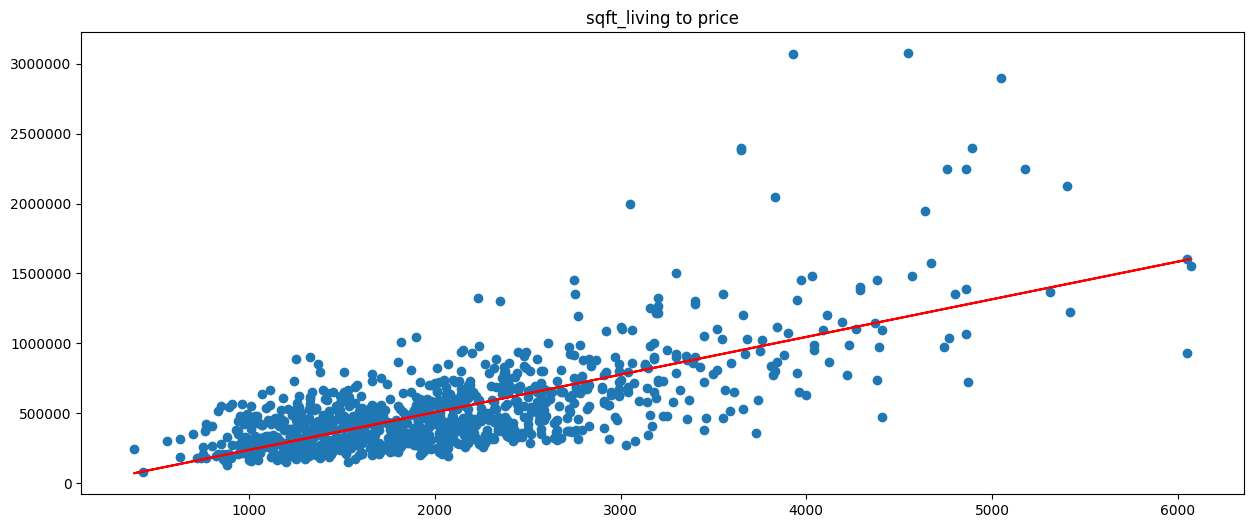

In [14]:
#b)

#Your code:
y_prediction = model.predict(X)
mse = mean_squared_error(y, y_prediction)
print("Mean squared error equals: {0}".format(mse))
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_[0]}")
print(f"Score: {model.score(X, y)}")

plt.figure(figsize=(15,6))
plt.scatter(X, y)
plt.plot(X, y_prediction, color='red')
plt.ticklabel_format(style='plain')
plt.title('sqft_living to price')
plt.show()
#Hint: model.predict(), model.intercept_,  model.coef_, model.score()

**Mean squared errors**: is a measure of how well regression model predicts the target variable. Lower MSE indicates a better fit.

**Intercept**: is a value of the predicted variable when all other features are zero. This is a point where regression line crosses the y-axis.

**Coefficient**: Represents the relationship between each feature and target variable. A positive coefficient indicates that the target variable increases as the feature increases.

**Score** the R-squared score is a measure that represents the proportion of variance in the target variable. Higher R-squared values indicate better fit (0 to 1).

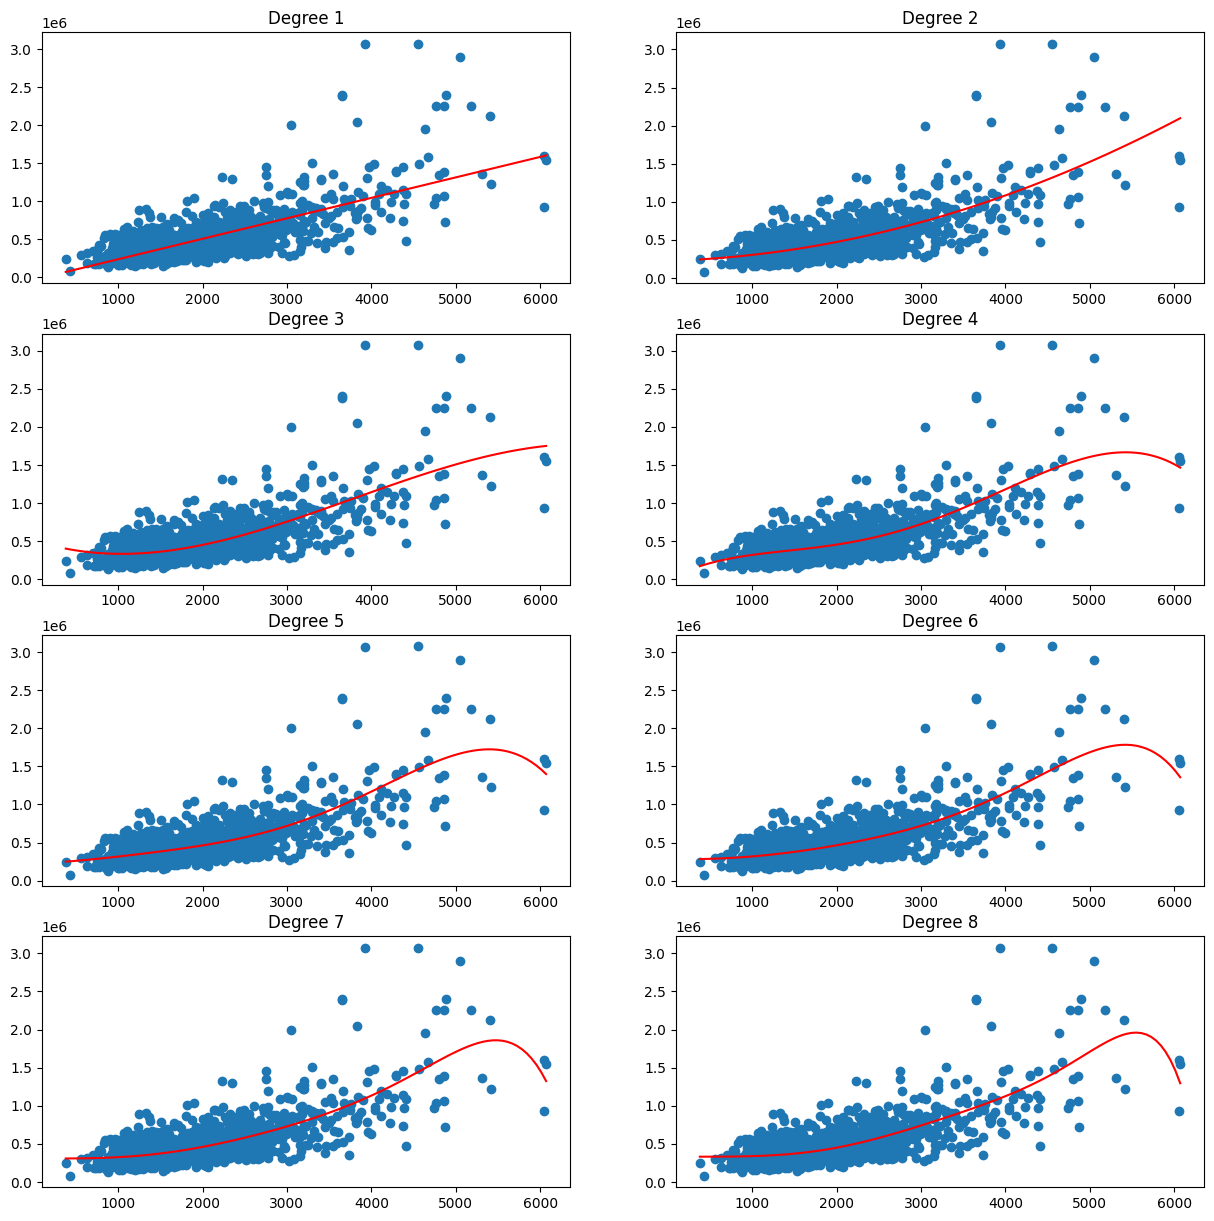

In [4]:
#c)

figure, axis = plt.subplots(4, 2, figsize=(15,15))
errors = []

for order in range(1,9):

    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)

    #Your code:
    model_order = LinearRegression()
    model_order.fit(X_order, y)

    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_range_poly = poly.transform(X_range)

    y_pred = model_order.predict(X_range_poly)

    mse = mean_squared_error(y, model_order.predict(X_order))
    errors.append(mse)

    row = (order - 1) // 2
    col = (order - 1) % 2

    axis[row, col].scatter(X, y)
    axis[row, col].plot(X_range, y_pred, color='red')
    axis[row, col].set_title("Degree {0}".format(order))

plt.show()


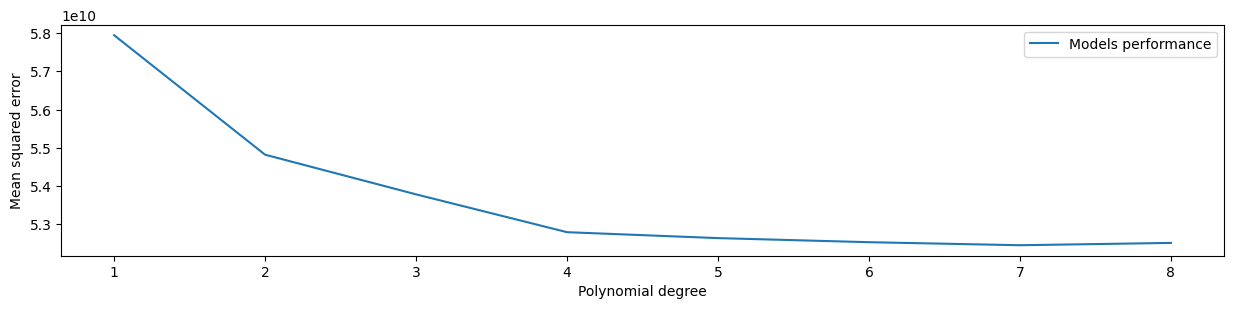

In [5]:
#Your code:
plt.figure(figsize=(15,3))
plt.plot(range(1, 9), errors, label="Models performance")
plt.xlabel("Polynomial degree")
plt.ylabel("Mean squared error")
plt.legend()
plt.show()

Higher-order polynomials can fit the training data better, but they risk overfitting.
**Overfitting** means that the model performs on the data too well, including its noise and random fluctuations. It will perform well on the training data but poorly on unseen data.  High-degree polynomials are prone to overfitting because they can create highly flexible curves that capture every detail of the training data

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models.

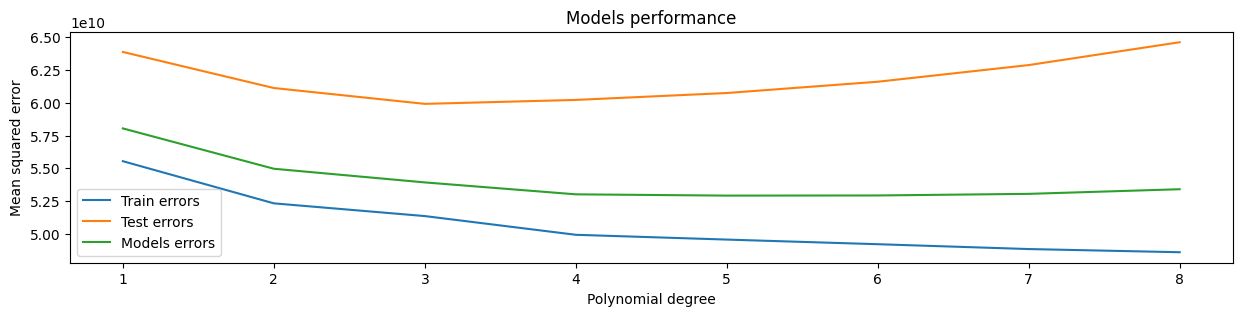

In [6]:
#a)
train_errors = []
test_errors = []
errors = []

for order in range(1,9):

    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44)

    model_order = LinearRegression()
    model_order.fit(X_train, y_train)

    y_train_pred = model_order.predict(X_train)
    y_test_pred = model_order.predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    mse = mean_squared_error(y, model_order.predict(X_order))

    train_errors.append(train_mse)
    test_errors.append(test_mse)
    errors.append(mse)

plt.figure(figsize=(15,3))
plt.plot(range(1, 9), train_errors, label="Train errors")
plt.plot(range(1, 9), test_errors, label="Test errors")
plt.plot(range(1, 9), errors, label="Models errors")
plt.xlabel("Polynomial degree")
plt.ylabel("Mean squared error")
plt.title("Models performance")
plt.legend()
plt.show()

**Training sample** is a portion of dataset that we give to train our model. It's the data that is used in "learning" realtionships between features and target variable

**Test sample** is a portion of dataset that we "hold back" from model douring training.

We can see that the test errors raise after 4 degree. That means that our model **Overfitts**


## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

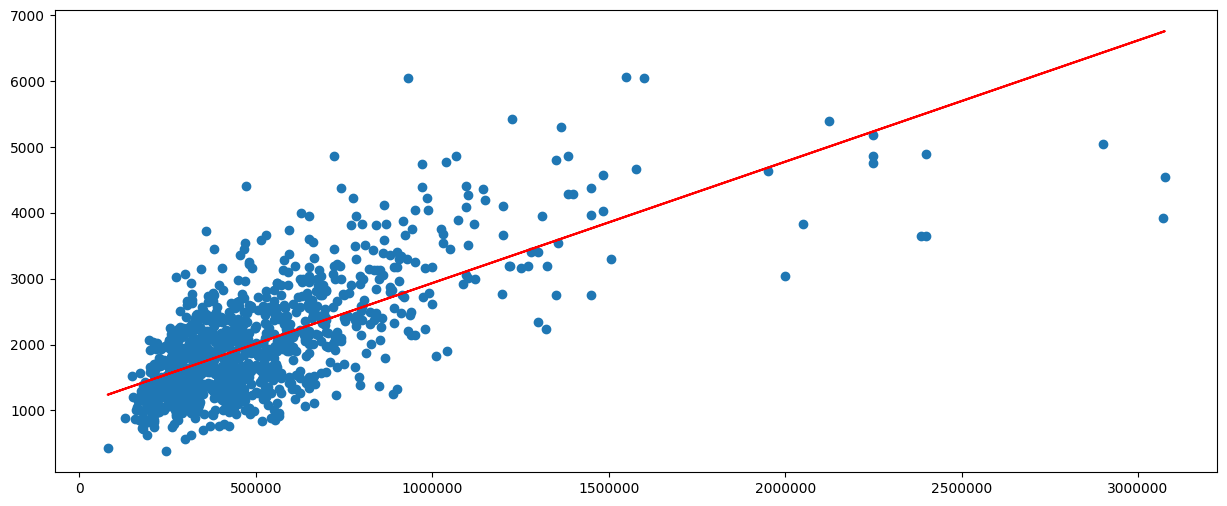

Mean squared error equals: 396407.1889615157


0.49670880166311404

In [7]:
#a)

X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

#Your code:
model = LinearRegression()
model.fit(X, y)
y_prediction = model.predict(X)

plt.figure(figsize=(15,6))
plt.scatter(X, y)
plt.plot(X, y_prediction, color='red')
plt.ticklabel_format(style='plain')
plt.show()
mse = mean_squared_error(y, y_prediction)
print("Mean squared error equals: {0}".format(mse))
model.score(X, y)
#Hint: .fit()

Linear Regression model captures the relationships despite having multiple features.

Mean squared error equals: 48749250331.21729


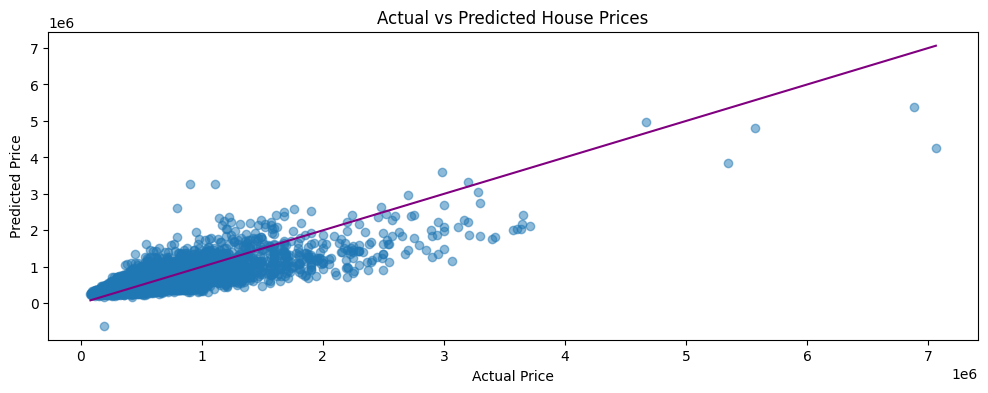

In [16]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)

model = LinearRegression()
_= model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


#Your model:
plt.figure(figsize=(12, 4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='purple') #y_pred, y_pred
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

Purple line indicates **ideal fit**. On this plot we can see performance of our model.